### Project Info

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict whether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
df = pd.read_csv('lending_club_loan_two.csv')

#get a brief description of the variable of interest

def describe(variable):
    with pd.option_context('display.max_colwidth',1000):
        print(df_info[df_info.index==variable]['Description'].to_string())

In [ ]:
df.head()

In [ ]:
df['loan_status'].value_counts()

In [63]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df.drop(columns='loan_status',inplace=True)

In [64]:
df['zip_code']=df['address'].str[-5:]
df['state']=df['address'].str[-8:-5]
df.drop(columns='address',inplace=True)

In [52]:
df['zip_code'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip_code, dtype: int64

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

We can see the biggest influence of our target variable *'loan_repaid'* is the *'int_rate'* of the loan. 

In [ ]:
for i in df.drop(columns=['emp_title','address']).columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(12,6))
        plt.legend(i)
        sns.histplot(x=df[i],bins=25)
        plt.show()
    else:
         plt.figure(figsize=(12,6))
         plt.legend(i)
         sns.barplot(x=df[i].value_counts().to_frame().head(20).index,y=df[i].value_counts().head(20))
         plt.show()

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)

In [65]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
describe('initial_list_status')

In [ ]:
df.emp_title.value_counts().size

In [66]:
df.drop(columns='emp_title',inplace=True) #173k unique titles
df.drop(columns='title',inplace=True) #43k unique titles

In [ ]:
sns.countplot(x=df['emp_length'],hue=df['loan_repaid'])

In [ ]:
emp1=df[df['loan_repaid']==1].groupby('emp_length').count()['loan_repaid']
emp0=df[df['loan_repaid']==0].groupby('emp_length').count()['loan_repaid']
emp=emp0/emp1
print(emp)

In [ ]:
emp.plot(kind='bar')

In [69]:
df.drop(columns='emp_length',inplace=True)
df.dropna(inplace=True)
df.drop(columns='grade',inplace=True)

In [67]:
df['year']=df.earliest_cr_line.str[-4:]
df['year'] = df['year'].astype('int')
df.drop(columns=['issue_d','earliest_cr_line'],inplace=True)

In [70]:
df.select_dtypes(['object']).columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type', 'zip_code', 'state'],
      dtype='object')

In [71]:
dummies = pd.get_dummies(df[['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type', 'zip_code', 'state']],drop_first=True)
df = df.drop(columns=['term', 'sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type', 'zip_code', 'state'])
df = pd.concat([df,dummies],axis=1)

In [73]:
df.columns.size

134

In [74]:
df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,year,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,state_AE,state_AK,state_AL,state_AP,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,1990,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,2004,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,2007,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,2006,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,1999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Dense
from tensorflow.keras.constraints import max_norm

In [76]:
X = df.drop(columns='loan_repaid').values
y = df['loan_repaid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)



In [100]:
model=Sequential()

model.add(Dense(68,activation='relu'))
model.add(Dropout(0.2))

#model.add(Dense(34,activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(17,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

In [88]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [101]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=450,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop] 
          )

Epoch 1/450
1081/1081 [==============================] - 3s 2ms/step - loss: 0.3126 - val_loss: 0.2694
Epoch 2/450
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2673 - val_loss: 0.2659
Epoch 3/450
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2632 - val_loss: 0.2637
Epoch 4/450
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2614 - val_loss: 0.2641
Epoch 5/450
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2598 - val_loss: 0.2629
Epoch 6/450
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2588 - val_loss: 0.2626
Epoch 7/450
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2582 - val_loss: 0.2623
Epoch 8/450
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2573 - val_loss: 0.2622
Epoch 9/450
1081/1081 [==============================] - 2s 2ms/step - loss: 0.2568 - val_loss: 0.2626
Epoch 10/450
1081/1081 [==============================] - 2s 2ms/step - l

<AxesSubplot:>

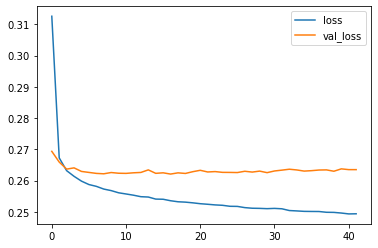

In [102]:
losses = pd.DataFrame(model.history.history)
losses.plot()


In [103]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3706/3706 [==============================] - 4s 937us/step


In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.46      0.62     23363
           1       0.88      0.99      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.91      0.73      0.78    118566
weighted avg       0.89      0.89      0.87    118566

